<a href="https://colab.research.google.com/github/saurav-kr/sentiment-analyzer/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Participants Name**

Saurav Kumar

Astha Padhi

Nikhil Kumar

Ananya Sarkar

Utkarsh Kumar Gupta

Divyesh Roy

Subham Kumar Sahoo

Prayag Raj Patra

Paulami Sur Roy


**Project Name: Sentiment Analysis on Amazon Fine Food Reviews Dataset**


**Github Link: ** https://github.com/saurav-kr/sentiment-analyzer


**Heroku Link: ** https://sentiment-analyzer-project.herokuapp.com/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/My Drive/Project/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568411 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568411 non-null  int64 
 1   ProductId               568411 non-null  object
 2   UserId                  568411 non-null  object
 3   ProfileName             568411 non-null  object
 4   HelpfulnessNumerator    568411 non-null  int64 
 5   HelpfulnessDenominator  568411 non-null  int64 
 6   Score                   568411 non-null  int64 
 7   Time                    568411 non-null  int64 
 8   Summary                 568411 non-null  object
 9   Text                    568411 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [ ]:
df['Sentiment']= np.where(df['Score']>3,'Positive','Negative')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive


In [ ]:
df = df.drop(['ProductId','UserId','ProfileName','Id','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time','Summary'], axis=1)
df.head()

,Text,Sentiment
0,I have bought several of the Vitality canned d...,Positive
1,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,This is a confection that has been around a fe...,Positive
3,If you are looking for the secret ingredient i...,Negative
4,Great taffy at a great price. There was a wid...,Positive


In [ ]:
df['Sentiment'].value_counts()

Positive    443766
Negative    124645
Name: Sentiment, dtype: int64

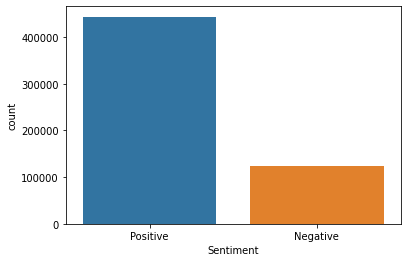

In [ ]:
sns.countplot(df['Sentiment'])
plt.show()

In [ ]:
x=df.iloc[:,0].values
y=df.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(397887,)
(170524,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df = 5, ngram_range = (1,2)).fit(x_train)

In [ ]:
feat = vect.get_feature_names()

In [ ]:
from wordcloud import WordCloud
cloud = WordCloud(width=1000, height=900).generate(" ".join(feat))

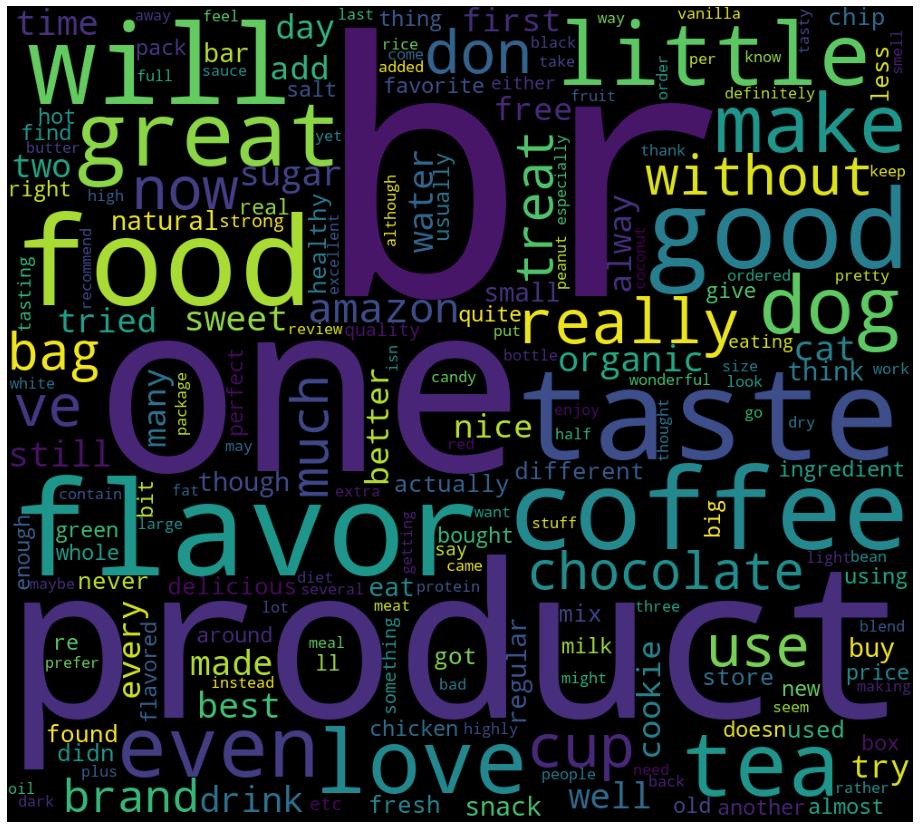

In [ ]:
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
text_model = Pipeline([('tfidf',TfidfVectorizer(min_df = 5, ngram_range = (1,3))),('model',LogisticRegression())])

In [ ]:
text_model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=5, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scali

In [ ]:
y_pred = text_model.predict(x_test)
y_pred

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Negative'], dtype=object)

In [ ]:
y_test

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [ ]:
text_model.predict(['I do not like this dish'])

array(['Negative'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_pred,y_test)*100

93.3798175036945

In [ ]:
confusion_matrix(y_pred,y_test)

array([[ 29201,   3004],
       [  8285, 130034]])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.78      0.91      0.84     32205
    Positive       0.98      0.94      0.96    138319

    accuracy                           0.93    170524
   macro avg       0.88      0.92      0.90    170524
weighted avg       0.94      0.93      0.94    170524

